# Imports

In [3]:
import pickle
from math import ceil
import visualize_plots as vp 
# Import visualization function from module

# Data

In [2]:
# Open pickle file with dataframe of cleaned divvy trips data
with open("data/divvy_trips.pkl", 'rb') as picklefile:
    df = pickle.load(picklefile)

# Calculate Revenue
Divvy technically has 3 tiers of riders. 
- The "Casual" rider pays \$3.00 for every 30 minutes of rental.   
- The "Day Pass" rider pays \\$15 for 3 hours worth of riding within 24 hours. After 3 hours, the "Day Pass" rider pays \\$3.00 for every 30 minutes.   
- The "Member" rider pays \\$99 for an annual membership. Included in the membership are unlimited rental under 45 mins. The "Member" rider pays \\$3.00 for ever 30 mins of rental beyond the first 45 mins.   

Unfortunately, we cannot calculate a full picture of Divvy's revenue from the data. In the 2020 data, the "Day Pass" rider is not a class under the "member_casual" category. Without rider IDs, we have no way of tracking subsequent rentals by the same rider. As such we must assume that all rides marked as "casual" were taken by "Casual" riders. In addition, the data does not include member_ids or any other identifying information. So we cannot track new members or incorporate membership fees into our revenue analysis. Instead, we are merely looking at the growth and shrinking of just revenue from "casual" and "member" rides only.

Please note that in August 2020 Divvy changed their pricing.

In [4]:
def calculate_fees(member_casual, minutes):
    '''
    member_casual [string] = rider's account type - 'member' or 'casual'
    minutes [float] = trip duration in minutes
    Function to calculate the fee of a trip according to Divvy's pricing policies as of June 2020. 
    fee float[int] = The fee in dollar of the trip
    '''
    if member_casual == 'member':
        chargable_time = minutes - 45
    else: # member_casual == 'casual'
        chargable_time = minutes
    if chargable_time < 0:
        fee = 0
    else: 
        fee = ceil(chargable_time / 30)*3
    return fee     

In [4]:
def add_revenue(df):
    '''
    df[dataframe] = Divvy dataframe with riders account type column and trip duration columns
    Function to apply the calculate_fees function to all the rows.
    df[dataframe] = Divvy dataframe with revenue fee column
    '''
    print('Before: ', df.shape)
    df['revenue'] = df.apply(lambda row: calculate_fees(row['member_casual'], row['duration_minutes']), axis = 1)
    print('After: ', df.shape)
    return df

In [5]:
df = add_revenue(df)

Before:  (1015635, 16)
After:  (1015635, 17)


# Visualize Revenue Sum by Week 

/home/jyychang/pandemic_divvy/visualize_plots.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', ' 2019-12-29', ' 2020-01-27', \


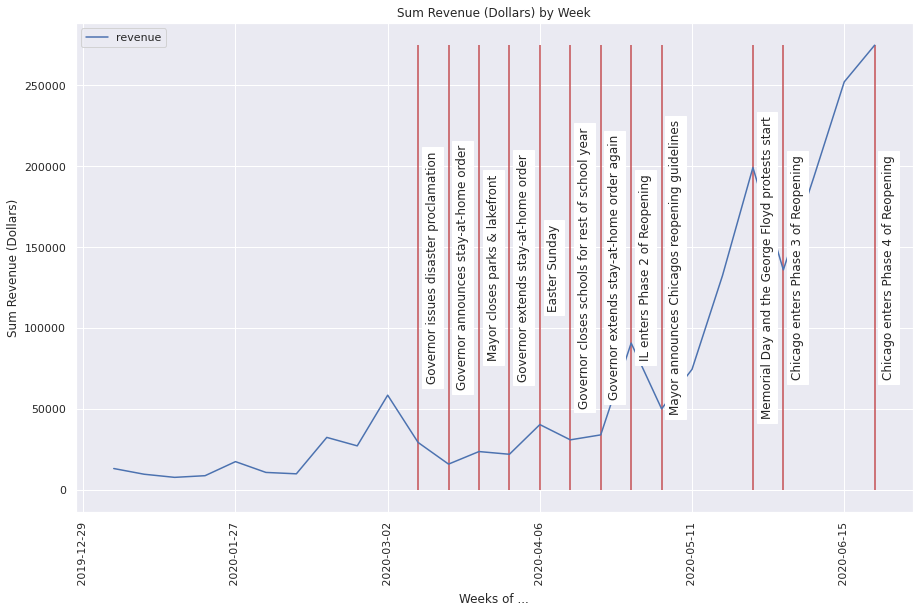

In [6]:
sum_rev_by_week = vp.plot_pivot(df, 'revenue', 'sum', 'Sum Revenue (Dollars)')
# applying the visualization function to look at the sum of revenue from "member" and "casual" trips across the weeks of 2020